In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

## plot samples

In [3]:
df = load_meta()

In [5]:
df = df[['population', 'sex', 'cell_line_id']]
df = df.groupby(['population', 'sex']).nunique().reset_index()
df['sex_sh'] = df.sex.map({'Male': 'M', 'Female': 'F'})

In [8]:
0.6148-0.5369

0.07789999999999997

In [10]:
5.3663-5.3309

0.0354000000000001

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


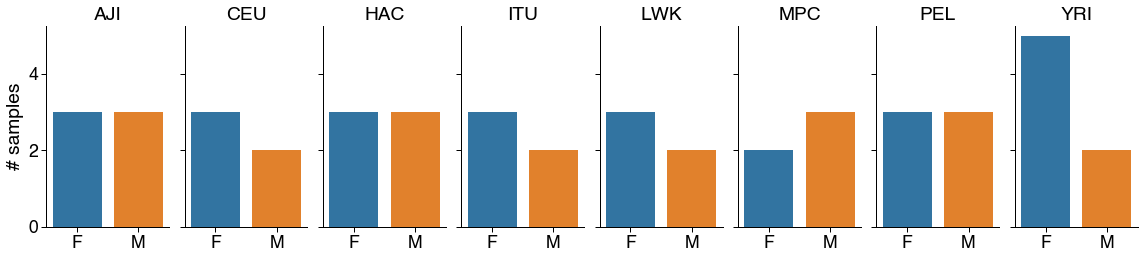

In [6]:
c_dict, order = get_population_colors(df.population.unique().tolist())
init_plot_settings()
g = sns.catplot(
    df, kind="bar",
    x="sex_sh", y="cell_line_id", col="population",
    height=4, aspect=.5
)
g.set_titles("{col_name}")
g.set_axis_labels("", "# samples")

plt.savefig('n_samples_sex_pop.pdf', dpi=500)